Dokumen ini berisi panduan terkait analysis extreme beserta plot hasil analisisnya.

Dokumen ini disusun oleh **Imam Wahyu Amanullah**
Pertanyaan terkait panduan ini dapat ditanyakan langsung pada email [wahyu.amanullah@gmail.com](wahyu.amanullah@gmail.com)

Step 1: Pastikan akun google yang anda gunakan untuk membuat document ini sudah memiliki file hasil olahan extreme analysis

Step 2: Sambungkan google drive anda dengan google colab

Step 3: Download versi terkini kode pengolahan data

In [1]:
!git clone https://github.com/iuiuiu-wayy/ExtremeAnalysis

Cloning into 'ExtremeAnalysis'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 8 (delta 1), pack-reused 0
Unpacking objects: 100% (12/12), done.


Jika berhasil akan terlihat folder ExtremeAnalysis

Step 4: Install modul yg diperlukan

In [5]:
!pip install -r ExtremeAnalysis/requirements.txt >& tmp
!cat tmp | grep error

Jika tidak ada error, Semua module yang diperlukan untuk analisis telah terinstall

Step 5: import module yang diperlukan

In [7]:
from ExtremeAnalysis import SpatialOperations, ExtremePrecIndexFunctions
ECIO = ExtremePrecIndexFunctions()
So = SpatialOperations()

Step 6: Semua direktori data yang dibutuhkan sudah dimasukkan dengan benar

In [8]:
So.GEVparamDir = '/content/drive/MyDrive/Bahan Pelatihan/DataIklimEkstrim/GEVparams'
So.DATADIR = '/content/drive/MyDrive/Bahan Pelatihan/DataIklimEkstrim/chirps/'
So.GDRIVELOC = '/content/drive/MyDrive/Bahan Pelatihan/DataIklimEkstrim/CityECI2'
So.GCMDIRS = '/content/drive/MyDrive/Bahan Pelatihan/DataIklimEkstrim/GCM'
So.ReferenceFile = '/content/drive/MyDrive/Bahan Pelatihan/DataIklimEkstrim/wc2.1_30s_prec_01.tif'
So.GCMdir = '/content/drive/MyDrive/Bahan Pelatihan/DataIklimEkstrim/GCM'
So.BaselineGCMdir = '/content/drive/MyDrive/Bahan Pelatihan/DataIklimEkstrim/baselineGCM2'
So.polynomParamsDir = '/content/drive/MyDrive/Bahan Pelatihan/DataIklimEkstrim/PolynomParams2'
So.correctedDataDir = '/content/drive/MyDrive/Bahan Pelatihan/DataIklimEkstrim/correctedData2'
So.QCDir = '/content/drive/MyDrive/Bahan Pelatihan/DataIklimEkstrim/QCData'
So.SHPDir = '/content/drive/MyDrive/Bahan Pelatihan/DataIklimEkstrim/SHPs'

Step 7: Setelah semua file analysis terhubung, Pilih kota, GCM, index iklim extreme, dan RCP yang ingin diplot
Untuk kota, terdapat pilihan sebagai berikut:
 

*   'Banjarmasin': [-3.26,  -3.37, 114.54 , 114.65],
*   'Pangkalpinang': [-2.07,  -2.16, 106.06, 106.18],
*   'Ternate1' : [0.921, 0.747, 127.288, 127.395],
*   'Ternate2' : [0.482, 0.431, 127.38, 127.441],
*   'Ternate3' : [1.354, 1.279, 126.356, 126.417],
*   'Ternate4' : [0.99, 0.955, 126.126, 126.163],
*   'Bandar Lampung': [-5.33, -5.53, 105.18, 105.35],
*   'Mataram':[-8.55,  -8.62 ,116.06, 116.16],
*   'Samarinda': [0.71, 0.3, 117.04, 117.31],            
*   'Pekanbaru': [0.61, 0.41, 101.36, 101.52],
*   'Gorontalo': [0.6, 0.5, 123.0, 123.08],
*   'Cirebon': [-6.68, -6.8, 108.51, 108.59],
*   'Kupang': [-10.12, -10.22, 123.54, 123.68]



Berikut beberapa index iklim extrim yang dapat dipilah:  
'CDD'
'CWD'
'r20mm'
'rx1day'
'rx5day'
'Prec95p' 
'Prec99p'


Berikut list GCM yang dapat dipilih:

'MIROC-ESM', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'bcc-csm1-1', 'MIROC5', 'GFDL-ESM2M', 'CSIRO-Mk3-6-0', 'NorESM1-M', 'CCSM4'


Untuk saat ini hanya ada dua RCP yang tersedia: 
'rcp45'
'rcp85'

variabel data2correct digunakan memilih data yang digunakan untuk memilih data yang diinginkan antara data ('baseline') atau future data lampau ('rcp')


In [9]:
city = 'Banjarmasin' 
param = 'CDD'
gcm = 'IPSL-CM5A-LR'
rcp = 'rcp85'
data2correct = 'rcp'  # 'baseline' untuk memilih data baseline atau 'rcp' untuk memilih future data

mod_data = So.getQCData(city, gcm, rcp, param, data2correct)

Step 8: plot data
Untuk data baseline, terdapat data untuk tahun 1991 sampai dengan 2020
Untuk data proyeksi, terdapat data untuk tahun 2021 sampai dengan 2050


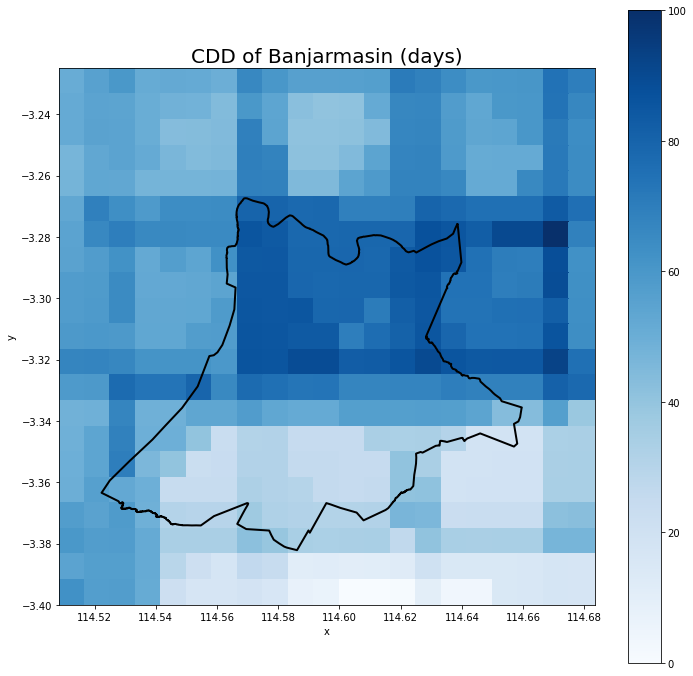

In [57]:
tahun = 2001
zoom = 20
warna = 'Blues'   # pilih salah satu dari warna di bawah
#['hot_r', 'hot', 'magma', 'magma_r', 'coolwarm', 'coolwarm_r', 'Blues', 'Blues_r', 'reds']
#['autumn', 'autumn_r', ]
judul = 'CDD of Banjarmasin (days)'
max_colorbar = 100
min_colorbar = 0



from matplotlib import colors
import geopandas as gpd
# import rasterio
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from rasterio.plot import plotting_extent
import rasterio as rio
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.titlesize'] = 20
shp = gpd.read_file(os.path.join(So.SHPDir, city + '.shp'))
if data2correct == 'baseline':
    red_tmp = tahun - 1991
else:
    red_tmp = tahun - 2021
zoomed = mod_data.isel(time=red_tmp, x=slice(zoom,-zoom), y=slice(zoom,-zoom))
cmap = plt.get_cmap(warna)
f, ax = plt.subplots()
plotmap = zoomed.plot(ax=ax, cmap=cmap)
shp[shp.NAMOBJ=='Kota '+city].plot(ax=ax, edgecolor='black', linewidth=2, facecolor="none")
ax.set_title(judul)
plotmap.colorbar.remove()
mesh = ax.pcolormesh(zoomed, cmap = cmap)
mesh.set_clim(min_colorbar,max_colorbar)
f.colorbar(mesh,ax=ax)